# Netid: ja743, mce58

# Problem: 
## In the one year time period from July 01, 2014 to June 30, 2015, the temperatures in Houston, Texas and Jacksonville, Florida peaked some of its highest values. Additionally, after doing some online research, we've observed some consistent data that reveals the police-related fatality rates for these two states to be considerably higher than than the rest of the United States. With this information, we've decided to seek a correlation between the monthly deaths by police in these specific states and the average high temperatures for that month of popular cities belonging to these states. 

# Hypothesis 1: 
### We hypothesize that the city with the larger average highest temperature for the month will also have the higher police-related fatalities in the given month.

# Methodology:

## 1) Import: csv files 

## 2) Clean Weather csv's:
### - We must drop all columns excpet for 'date', 'actual_mean_temp', 'actual_min_temp', 'actual_max_temp' and ### - Drop all skewed data and NaN values that may hinder accurate data

## 3) Manipulate Weather csv's:
### - Calculate the average highest daily temperatures for each month within the given one year time period 
### - Record said data into an ordered (by month) array 

## 4) Clean and Manipulate Police-Related Fatalities csv:
### - First calculate the deaths by police only within the given time period
### - Now limit this set to the deaths occured within the Texas and Florida because we've obtained data on two major cities in those states: Houston and Jacksonville, respectively
### - Now calculate the deaths by month and record in ordered (by month) array

## 5) Visualizations:
### - We will now plot a 3D scatter plot, showing the correlation between the average highest temperatures for each month and the recorded deaths by police for each month, FOR both cities.
### - The axises are: X-axis: 12 month period, Y-axis: Average highest temps, Z-axis: Police fatalities for the month


# 6) Modeling Predictions: 

### Once we have proven or disproven our thesis, we plan to focus strictly on the Police-Related Fatalities dataset for the modeling portion of our project. We have chosen to do this because for the first half of our project, we've scoped down our data too much to be of any use for an insightful model/prediction.

## Manipulate Police-Related Fatalities csv to be used in KNN model:

### - The columns being used ('Race', 'Mental_illness', 'Armed', 'State')
### - Because the values belonging to the column 'Race' and 'Armed' aren't numerical/boolean, we must first add additional columns to the dataframe to represent their numerical/boolean versions 
### - Race: Asian, Black, Hispanic, Native, Other, White --> races: 1, 2, 3, 4, 5, 6
### - Armed: NaN, not NaN (not NaN meaning person was armed w/ a weapon) --> armed: False, True 

## a) KNN Modeling to predict if the person was armed during the police encounter:
### - First model: Using the 'races' and 'Mental_illness' columns as features and 'armed' column as our target, we will train our KNN model to predict of the person was armed. We will then determine the accuracy scores of our predictions

## b) KNN Modeling to predict if the person had a mental illness:
### - Second model: Using the 'races' and 'armed' columns as features and 'Mental_illness' column as our target, we will train our KNN model to predict if the person had an illness. We will then determine the accuracy scores of our predictions

## c) KNN Modeling to predict the race of the person:
### - Third model: Using the 'Mental_illness' and 'armed' columns as features and 'races' column as our target, we will train our KNN model to predict the race of person. We will then determine the accuracy scores of our predictions

# Resources and Links:
https://github.com/fivethirtyeight/data/blob/master/us-weather-history/KHOU.csv
https://github.com/fivethirtyeight/data/blob/master/us-weather-history/KJAX.csv
https://data.world/awram/us-police-involved-fatalities/workspace/file?filename=Police+Fatalities.csv
https://mappingpoliceviolence.org/states

In [1]:
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Inport Weather and Police-Related Fatalities Data

In [ ]:
KJAX = pd.read_csv('KJAX.csv')
KHOU = pd.read_csv('KHOU.csv')
PO_FTL = pd.read_csv('Police Fatalities.csv', encoding = "ISO-8859-1")

# 2a. Clean Houston Weather Data 

In [ ]:
KHOU.drop(columns=['average_min_temp','average_max_temp','record_min_temp','record_max_temp','record_min_temp_year','record_max_temp_year','actual_precipitation','average_precipitation','record_precipitation']).dropna().head()

# 2b. Clean Jacksonville Weather Data 

In [ ]:
KJAX.drop(columns=['average_min_temp','average_max_temp','record_min_temp','record_max_temp','record_min_temp_year','record_max_temp_year','actual_precipitation','average_precipitation','record_precipitation']).dropna().head()

# 3a. Manipulate Houston Weather Data

In [8]:
h_high_unordered = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

pos = 0

for i in range(1,13):
    sum = 0
    for j in range(len(KHOU)): 
        date = "2014-" + str(i)
        if(i < 7):
            date = "2015-" + str(i)
        if KHOU['date'][j].find(date) == 0:
            h_high_unordered[pos] = h_high_unordered[pos] + KHOU['actual_max_temp'][j]
            sum = sum + 1
    h_high_unordered[pos] = h_high_unordered[pos]/sum
    pos = pos + 1


h_high = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
    
for m in range(0,6):
    n = m + 6
    h_high[m] = h_high_unordered[n]
    
for z in range(6,12):
    y = z - 6
    h_high[z] = h_high_unordered[y]

print("Average Value of Daily Highs Ordered (July 2014 - June 2015) in Hoston: ", h_high)

Average Value of Daily Highs Ordered (July 2014 - June 2015) in Hoston:  [93 93 89 84 67 65 59 63 72 80 84 90]


# 3b. Manipulate Jacksonville Weather Data

In [9]:
j_high_unordered = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

pos = 0

for i in range(1,13):
    sum = 0
    for j in range(len(KJAX)): 
        date = "2014-" + str(i)
        if(i < 7):
            date = "2015-" + str(i)
        if KJAX['date'][j].find(date) == 0:
            j_high_unordered[pos] = j_high_unordered[pos] + KJAX['actual_max_temp'][j]
            sum = sum + 1
    j_high_unordered[pos] = j_high_unordered[pos]/sum
    pos = pos + 1


j_high = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
    
for m in range(0,6):
    n = m + 6
    j_high[m] = j_high_unordered[n]
    
for z in range(6,12):
    y = z - 6
    j_high[z] = j_high_unordered[y]

print("Average Value of Daily Highs Ordered (July 2014 - June 2015) in Florida: ", j_high)

Average Value of Daily Highs Ordered (July 2014 - June 2015) in Florida:  [90 91 85 81 68 69 63 62 76 81 85 91]


# 4a. Manipulate Police-Related Fatalities csv for Texas 

In [10]:
h_fatalities_unordered = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

pos = 0

for i in range(1,13):
    for j in range(len(PO_FTL)): 
        if (i < 7):
            if('2015' in PO_FTL['Date'][j]):
                month = str(i) + "/"
                if(PO_FTL['Date'][j].find(month) == 0):
                    if(PO_FTL['State'][j] == "TX"):
                        h_fatalities_unordered[pos] = h_fatalities_unordered[pos] + 1
        else:
            if('2014' in PO_FTL['Date'][j]):
                month = str(i) + "/"
                if(PO_FTL['Date'][j].find(month) == 0):
                    if(PO_FTL['State'][j] == "TX"):
                        h_fatalities_unordered[pos] = h_fatalities_unordered[pos] + 1            
    pos = pos + 1

h_fatalities = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
    
for m in range(0,6):
    n = m + 6
    h_fatalities[m] = h_fatalities_unordered[n]
    
for z in range(6,12):
    y = z - 6
    h_fatalities[z] = h_fatalities_unordered[y]

print("Number of Police Fatalities(July 2014 - June 2015) in Texas: ", h_fatalities)

Number of Police Fatalities(July 2014 - June 2015) in Texas:  [10 19  9 10  5  9 34 19  8 16 21 23]


# 4b. Manipulate Police-Related Fatalities csv for Florida 

In [1]:
j_fatalities_unordered = np.array([0,0,0,0,0,0,0,0,0,0,0,0])

pos = 0

for i in range(1,13):
    for j in range(len(PO_FTL)): 
        if (i < 7):
            if('2015' in PO_FTL['Date'][j]):
                month = str(i) + "/"
                if(PO_FTL['Date'][j].find(month) == 0):
                    if(PO_FTL['State'][j] == "FL"):
                        j_fatalities_unordered[pos] = j_fatalities_unordered[pos] + 1
        else:
            if('2014' in PO_FTL['Date'][j]):
                month = str(i) + "/"
                if(PO_FTL['Date'][j].find(month) == 0):
                    if(PO_FTL['State'][j] == "FL"):
                        j_fatalities_unordered[pos] = j_fatalities_unordered[pos] + 1            
    pos = pos + 1

j_fatalities = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
    
for m in range(0,6):
    n = m + 6
    j_fatalities[m] = j_fatalities_unordered[n]
    
for z in range(6,12):
    y = z - 6
    j_fatalities[z] = j_fatalities_unordered[y]

print("Number of Police Fatalities(July 2014 - June 2015) in Jacksonville: ", j_fatalities)

NameError: name 'np' is not defined

# 5a. Houston's Weather vs Police-Related Fatalities (Visualization) 

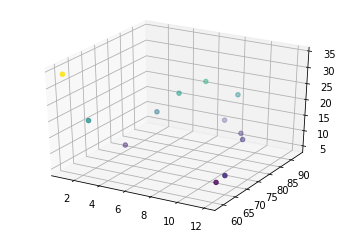

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

h_months = [7,8,9,10,11,12,1,2,3,4,5,6]

# Data for three-dimensional scattered points
ax.scatter3D(h_months, h_high, h_fatalities, c=h_fatalities);

# 5b. Jacksonville's Weather vs Police-Related Fatalities (Visualization) 

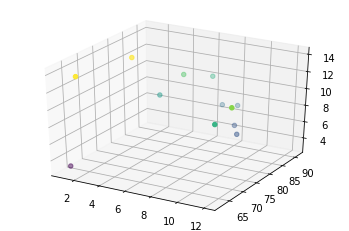

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

j_months = [7,8,9,10,11,12,1,2,3,4,5,6]

# Data for three-dimensional scattered points
ax.scatter3D(j_months, j_high, j_fatalities, c=j_fatalities);

# Modeling Predictions using Three KNN models

## Manipulating Police-Related Fatalities csv

In [53]:
pf_data = PO_FTL.copy().dropna(subset=['Race', 'Mental_illness', 'State'])
#pf_data.head(-10)

In [54]:
import math
races = []
for i in range(len(pf_data['Race'])):
    if pf_data['Race'][i] == "Asian":
        races.append(1)
    if pf_data['Race'][i] == "Black":
        races.append(2)
    if pf_data['Race'][i] == "Hispanic":
        races.append(3)
    if pf_data['Race'][i] == "Native":
        races.append(4)
    if pf_data['Race'][i] == "White":
        races.append(5)
    if pf_data['Race'][i] == "Other":
        races.append(6)
#print(races)

armed = []
for i in pf_data['Armed']:
    if type(i) is float:
        armed.append(False)
    else:
        armed.append(True)
#print(armed)

pf_data['races'] = races
pf_data['armed'] = armed
pf_data.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,races,armed
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,1,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,1,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,1,True
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,1,True
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,1,True


## 6a. KNN Modeling to predict if the person was armed during the police encounter:

In [61]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

inputs = pf_data[['races', 'Mental_illness']]
outputs = pf_data['armed']
model = KNeighborsClassifier()

known_input, future_input, known_output, future_output = train_test_split(inputs, outputs, test_size=0.25, random_state=42)

model.fit(known_input, known_output)

predictions = model.predict(future_input)

# compare Actual Armed status and the Predicted Armed status
pd.DataFrame({"Actual Armed status":future_output, "PREDICTED Armed status":predictions}).reset_index(drop=True).head(10)

,Actual Armed status,PREDICTED Armed status
0,False,True
1,True,True
2,False,True
3,True,True
4,False,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


## Score for First KNN model

In [56]:
print("sklearn's accuracy score for is Armed prediction:", metrics.accuracy_score(future_output, predictions))

sklearn's accuracy score for is Armed: 0.5637898686679175


## 6b. KNN Modeling to predict if the person had a mental illness:

In [62]:
inputs1 = pf_data[['races', 'armed']]
outputs1 = pf_data['Mental_illness']
model1 = KNeighborsClassifier()

known_input1, future_input1, known_output1, future_output1 = train_test_split(inputs1, outputs1, test_size=0.3, random_state=42)

model1.fit(known_input1, known_output1)

predictions1 = model1.predict(future_input1)

# compare Actual illness status and the PREDICTED illness status
pd.DataFrame({"Actual illness status":future_output1, "PREDICTED illness status":predictions1}).reset_index(drop=True).head(10)

,Actual illness status,PREDICTED illness status
0,True,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,True,False


## Score for Second KNN model

In [63]:
print("sklearn's accuracy score for mental illness prediction:", metrics.accuracy_score(future_output1, predictions1))

sklearn's accuracy score for mental illness prediction: 0.7912431587177482


## 6c. KNN Modeling to predict the race of the person:

In [64]:
inputs2 = pf_data[['Mental_illness', 'armed']]
outputs2 = pf_data['races']
model2 = KNeighborsClassifier()

known_input2, future_input2, known_output2, future_output2 = train_test_split(inputs2, outputs2, test_size=0.18, random_state=42)

model2.fit(known_input2, known_output2) # tell it known stuff

predictions2 = model2.predict(future_input2) # given future input, predict future output!

# compare Actual Race and the Predicted Race
pd.DataFrame({"Actual Race":future_output2, "Predicted Race":predictions2}).reset_index(drop=True).head(10)

,Actual Race,Predicted Race
0,5,5
1,3,5
2,5,2
3,2,5
4,2,2
5,3,5
6,2,5
7,2,5
8,5,5
9,5,5


## Score for Third KNN model

In [49]:
print("sklearn's accuracy score for Race prediction:", metrics.accuracy_score(future_output2, predictions2))

sklearn's accuracy score for mental illness: 0.43713355048859937


# Final Observations:
## After perfoming our predictive analysis using KNN modeling, we've come up with an analysis for our lowest score

## Score of Third model:
### We've noticed that our accuracy score for our third model was the lowest. This model was created to predict the race of the person killed by the police on the basis of whether they were armed durin the encounter and had a mental illness. The correleation between the features and the target are weak, as proven by the score. To further explain why, we've done some online research. It was later determined that roughly 78% of police encounters that had resulted in a death, the suspect was armed in some way. Given this high percentage, our model was not trained with high efficiency because of this specifc feature, 'armed'. It was clear that our model had trouble differentiating between the races and this could be the main reason behind the low score. 

# Final Conclusion:
## Our initial hypothesis was proven to be correct and using the 3D scatter plot under the visualization section, it is noticeable that the city with the average highest temperatures for each month, Jacksonville, Fl, also happens to have a higher number of fatalities by police. For this data, we can conclude that there is a strong correlation between the high temperatures in a certain region and the number of police-related fatalities in that region. 